In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import base64
import re
import os

In [252]:
#################################
# Imports
#################################
def Parse_mzML(file):

    #################################
    # Decode the data from mzML files
    #
    # - file : path to mzML file
    # - returns: - list of retention times
    #            - list of intensities
    #            - list of Q1 and Q3 masses
    #################################
    
    binary = []
    chrom_time = []
    chrom_int = []

    tag = []
    Q1 = []
    Q3 = []
    temp = []
    iterator = 0
    testit = 0

    f = open(file, 'r')
    for line in f:
        testit += 1
        

        #################################
        # Decode retention time and intensity
        #################################
        
        if "time array" in line:
            time_data = True
            intensity_data = False
        if "intensity array" in line:
            time_data = False
            intensity_data = True
        if "64-bit float" in line:
            f_type = np.float64
        if "32-bit float" in line:
            f_type = np.float32
        if "<binary>" in line:
            binary = re.sub("<binary>", "", re.sub("</binary>", "", line.strip()))
            decoded = base64.b64decode(binary)
            array = np.frombuffer(decoded, f_type)
            if f_type == np.float64:
                if time_data == True:
                    chrom_time.append([array, iterator])
                    time_data = False
                if intensity_data == True:
                    chrom_int.append([array, iterator])
                    iterator = iterator + 1
                    intensity_data = False
#                     print(testit)
            else:
                if time_data == True:
                    chrom_time.append([array, iterator])
                    time_data =False
                if intensity_data == True:
                    chrom_int.append([array, iterator])
                    iterator = iterator + 1
                    intensity_data = False
                    
        #################################
        # Caution! this line is dependent on instrument/analysis
        #################################         
        if "offset idRef=\"SRM " in line:
            temp = (line.strip().split())
            for i in range(0, len(temp)):
                if "SIC" in temp[i]:
#                     print(temp[i+1].split('"')[0].split(','))
                    tag.append(temp[i+1].split('"')[0].split(','))

    f.close()
    return (chrom_time[1:], chrom_int[1:], tag)

def Parse_OP(file):
    
    info = []
    f = open(file, 'r')
    for line in f:
        info.append(line.strip().split())
    f.close()
    return (info)

def Match_names(mzml_data, op_data):

    #################################
    # Match the Q1 and Q3 values from the mzML to the ones in the MetIDQ OP
    # - mzml_data : list of Q1 and Q3 mases returned by Parse_mzML
    # - op_data : list of Q1 and Q3 and the corresponding name returned by Parse_MetIDQ_OP
    # - returns: - list of names corresponsing to the chromatograms, in order
    #################################
    
    analyte_list = []
    for j in range(0, len(mzml_data)):
        found = False
        for i in range(0, len(op_data)):
            if found == False:
                if abs(float(mzml_data[j][0]) - float(op_data[i][1])) < 0.0001:
#                     if abs(float(mzml_data[j][1]) - float(op_data[i][2])) < 0.11:
                    analyte_list.append([op_data[i][0] , j])
                    found = True
                    
    return (analyte_list)

def convert(infile, outfile):
    string = str(r'"C:\Users\cerb_\AppData\Local\Apps\ProteoWizard 3.0.20146.3bd9b4ecf 64-bit\msconvert.exe" ' + str(infile) + r' -o ' + str(outfile))
    stream = os.popen(string)
    
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def FWHM(X,Y):
    half_max = np.max(Y) / 2.
    idx1 = None
    idx2 = None
    passed = False
    done = False
    for i in range(len(Y)):
        if passed == False:
            if Y[i] >= half_max:
                idx1 = i
                passed = True
        else:
            if Y[i] < half_max:
                idx2 = i
                done = True

        if done == True:
            break
    print('values are',X[idx1],X[idx2])
    
    return X[idx2] - X[idx1]

Change here:
infile is the raw data file
outfile is the folder where to save it

In [65]:
infile = r'C:\Users\cerb_\Desktop\Mahesh\ALlAcylCN_0,0833uM_45oC,0,4mlmin_05.raw'
outfile = r'C:\Users\cerb_\Desktop\Mahesh'

In [28]:
convert(infile,outfile)

In [66]:
file = r'C:\Users\cerb_\Desktop\Mahesh\ALlAcylCN_0,0833uM_45oC,0,4mlmin_05.mzML'

In [209]:
RT,INT,tag = Parse_mzML(file)

In [211]:
OP = r'C:\Users\cerb_\Desktop\Mahesh\OP.txt'
info = Parse_OP(OP)

In [212]:
matches = Match_names(tag,info)

In [214]:
matches

[['C0', 0],
 ['d3-C0', 1],
 ['C2', 2],
 ['d3-C2', 3],
 ['C3', 4],
 ['d3-C3', 5],
 ['iC4', 6],
 ['d3-C4', 7],
 ['C5:1', 8],
 ['C5:1', 9],
 ['C5-P', 10],
 ['C3-DC', 11],
 ['C3-DC', 12],
 ['d9-C5', 13],
 ['C6', 14],
 ['C6', 15],
 ['C4-DC', 16],
 ['C4-DC', 17],
 ['C4-DC', 18],
 ['C4-DC', 19],
 ['d3-C6', 20],
 ['C5-DC', 21],
 ['C5-DC', 22],
 ['C8:1', 24],
 ['C8', 25],
 ['C6-DC', 26],
 ['C6-DC', 27],
 ['C6-DC', 28],
 ['d3-C8', 29],
 ['C10:1', 30],
 ['C10', 31],
 ['C8-DC', 32],
 ['d3-C10', 33],
 ['C12:1', 34],
 ['C12', 35],
 ['C10-DC', 36],
 ['d3-C12', 37],
 ['C12-OH', 38],
 ['C14:2', 39],
 ['C14:1', 40],
 ['C14', 41],
 ['d3-C14', 42],
 ['cis-9-C16:1', 43],
 ['C16', 44],
 ['d3-C16', 45],
 ['C16:1-OH', 46],
 ['C16-OH', 47],
 ['C18:2', 48],
 ['C18:1', 49],
 ['C18', 50],
 ['d3-C18', 51],
 ['C18:1-OH', 52],
 ['C18-OH', 53],
 ['C20:4', 54]]

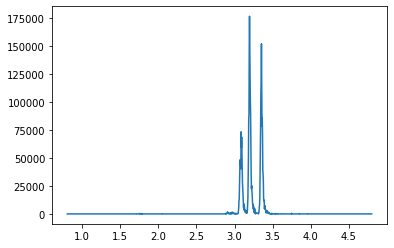

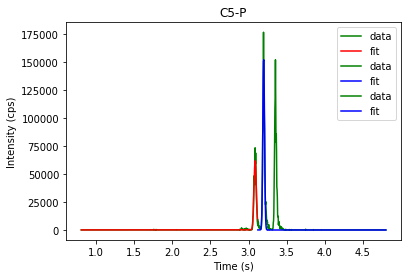

In [273]:
idx = 10
limit = 3.12
limit2 = None
limit2 = 3.25
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []


for i in range(len(RT[idx][0])):
    if RT[idx][0][i] < limit:
        x1.append(RT[idx][0][i])
        y1.append(INT[idx][0][i])
    elif limit2 == None:
        x2.append(RT[idx][0][i])
        y2.append(INT[idx][0][i])
    elif limit2 != None:
        if RT[idx][0][i] > limit and RT[idx][0][i] < limit2 :
            x2.append(RT[idx][0][i])
            y2.append(INT[idx][0][i])
        else: 
            x3.append(RT[idx][0][i])
            y3.append(INT[idx][0][i])
X = [x1,x2]
Y = [y1,y2]
if limit2:
    X = [x1,x2,x3]
    Y = [y1,y2,x3]


plt.plot(RT[idx][0], INT[idx][0])
plt.show()
fit = []
fit_data = []
for i in range(len(X)):
    x = np.array(X[i])
    y = np.array(Y[i])

    # weighted arithmetic mean (corrected - check the section below)
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

    popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
    fit_data.append([popt,pcov])
    
    fit.append(Gauss(x, *popt))
    
plt.plot(x1, y1, 'g', label='data')
plt.plot(x1, fit[0], 'r-', label='fit')
plt.plot(x2, y2, 'g', label='data')
plt.plot(x2, fit[1], 'b-', label='fit')
if limit2:
    plt.plot(x3, y3, 'g', label='data')
    plt.plot(x3, fit[2], 'b-', label='fit')
plt.legend()
plt.title(str(matches[idx][0]))
plt.xlabel('Time (s)')
plt.ylabel('Intensity (cps)')
plt.show()

In [281]:
RTp1 = RT[idx][0][np.argmax(fit[0])]
RTp2 = RT[idx][0][np.argmax(fit[1]) + len(X[0])]
RTp3 = RT[idx][0][np.argmax(fit[2]) + len(X[0])+ len(X[1])]
x = np.linspace(RT[idx][0][0],RT[idx][0][len(X[0])], 500)
new_fit = Gauss(x, *fit_data[0][0])
w1 = FWHM(x,new_fit)
x = np.linspace(RT[idx][0][len(X[0])],RT[idx][0][len(X[1])+ len(X[0])-1], 500)
new_fit = Gauss(x, *fit_data[1][0])
w2 = FWHM(x,new_fit)
if limit2 != None:
    x = np.linspace(RT[idx][0][len(X[1])+ len(X[0])],RT[idx][0][-1], 500)
    new_fit = Gauss(x, *fit_data[1][0])
    w3 = FWHM(x,new_fit)
print('width 1 is: ', w1)
print('width 2 is: ', w2)

if limit2 != None:
    print('width 3 is: ', w3)

values are 3.0700520874264243 3.10717780484943
values are 3.1848146050630923 3.2112767404927043
values are 3.252816677093506 3.255913470694441
width 1 is:  0.03712571742300552
width 2 is:  0.026462135429611955
width 3 is:  0.003096793600934955


In [282]:
peak3 = True

In [283]:
RS = (RTp2 - RTp1)/(0.85*(w2 - w1))
Sep_fac = RTp2/RTp1
print('RS is: ', round(RS,2))
print('Separation factor is: ', round(Sep_fac,3))

if peak3 == True:
    RS = (RTp3 - RTp2)/(0.85*(w3 - w2))
    Sep_fac = RTp3/RTp2
    print('RS is: ', round(RS,2))
    print('Separation factor is: ', round(Sep_fac,3))

output = r'C:\Users\cerb_\Desktop\Mahesh\output.txt'
f = open(output,'a')
f.write(str(matches[idx][0]) + ' ' + str(RS) + ' ' + str(Sep_fac) + '\n')
f.close()

RS is:  -12.53
Separation factor is:  1.037
RS is:  -80.5
Separation factor is:  1.5
